In [1]:
# -----------------------------------------------------------
# 0. Imports
# -----------------------------------------------------------
import xarray as xr
import matplotlib.pyplot as plt

# Optional: nice geographic maps
# import cartopy.crs as ccrs

# -----------------------------------------------------------
# 1. Open the three NetCDF files as one virtual dataset
# -----------------------------------------------------------
files = [
    "samples/data_stream-oper_stepType-instant.nc",
    "samples/data_stream-oper_stepType-instant1.nc",
    "samples/data_stream-oper_stepType-instant2.nc"
]

# combine='by_coords' merges files that share the same
# coordinates along the time dimension (what ERA5 does).
ds = xr.open_mfdataset(files, combine="by_coords")

# Quick look at what we’ve got
print(ds)

<xarray.Dataset> Size: 3GB
Dimensions:     (valid_time: 26496, latitude: 101, longitude: 161)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 212kB 2011-06-01 ... 2022-08-31T2...
  * latitude    (latitude) float64 808B 60.0 59.75 59.5 ... 35.5 35.25 35.0
  * longitude   (longitude) float64 1kB -15.0 -14.75 -14.5 ... 24.5 24.75 25.0
    expver      (valid_time) <U4 424kB dask.array<chunksize=(8832,), meta=np.ndarray>
Data variables:
    d2m         (valid_time, latitude, longitude) float32 2GB dask.array<chunksize=(2208, 26, 41), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 2GB dask.array<chunksize=(2208, 26, 41), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:           

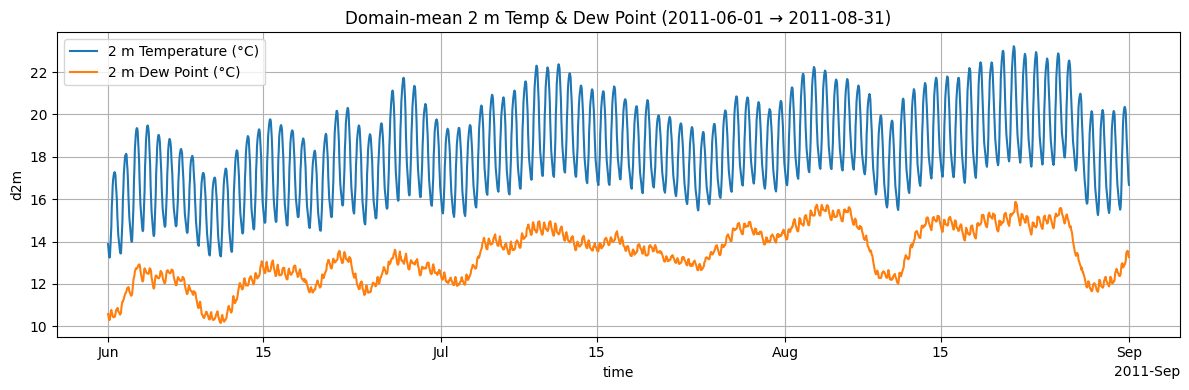

In [2]:
# -----------------------------------------------------------
# 2. Prepare variables (convert K → °C)
# -----------------------------------------------------------
t2m = ds['t2m'] - 273.15      # ERA5 stores temperatures in Kelvin
d2m = ds['d2m'] - 273.15

# -----------------------------------------------------------
# 3. Domain-mean time series (example: entire 2011 JJA season)
# -----------------------------------------------------------
# Slice the first summer just to keep the plot short;
# change the dates or drop the slice to see everything.
sel_start, sel_end = '2011-06-01', '2011-08-31'
t2m_mean = t2m.sel(valid_time=slice(sel_start, sel_end)).mean(dim=['latitude', 'longitude'])
d2m_mean = d2m.sel(valid_time=slice(sel_start, sel_end)).mean(dim=['latitude', 'longitude'])

plt.figure(figsize=(12, 4))
t2m_mean.plot(label='2 m Temperature (°C)')
d2m_mean.plot(label='2 m Dew Point (°C)')
plt.title(f'Domain-mean 2 m Temp & Dew Point ({sel_start} → {sel_end})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


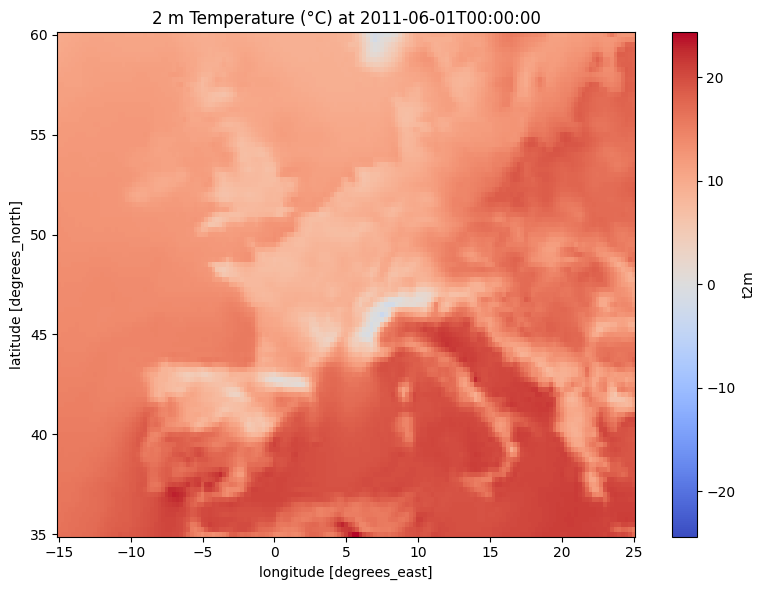

In [3]:
# -----------------------------------------------------------
# 4. Snapshot map at the very first time step
# -----------------------------------------------------------
# Choose a time index or timestamp you like:
snap = t2m.isel(valid_time=0)

# Simple plot with xarray’s built-in quick-and-dirty mapping
plt.figure(figsize=(8, 6))
snap.plot(cmap='coolwarm')
plt.title(f'2 m Temperature (°C) at {str(snap.valid_time.values)[:19]}')
plt.tight_layout()
plt.show()

# ------------- OPTIONAL: Cartopy map for nicer coastlines ------------
# ax = plt.axes(projection=ccrs.PlateCarree())
# snap.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',
#           cbar_kwargs={'label': '°C'})
# ax.coastlines()
# ax.set_title(f'2 m Temperature (°C) at {str(snap.time.values)[:19]}')
# plt.show()